## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

SEED = 42
pd.set_option('display.max_colwidth', None)

## Load and view data

In [2]:
path = 'data/ai-medical-chatbot.csv'
df = pd.read_csv(path)

In [3]:
df.sample(5, random_state=SEED)

,Description,Patient,Doctor
182751,Suggest remedy for itchy red bump on my toe,hi I had a red bump on my toe that itched at first I thought it was a bite but as the days went on it got harder and bigger so I thought something was stuck in my foot. I wear sandals all the time so I thought maybe a small piece of glass or something. I went on to carefully try to take it out but I didn t see anything there I put antibiotic on it and left it alone but when I woke up it was swollen and infected,"HelloIt may be due to allergy or infection.Swelling and redness may be due to infection more.Please apply antibiotic cream and leave it open so it will heal fast.Take pain killers like tab ibuprofen or tab paracetamol will also help in relieving inflamations.Prevent it from water.If not cured, consult your doctor.Take care..."
143970,What is the treatment for loose motion in a child?,"Hello sir,baby of age 7 months...suffering with loose motions for past 7 days... chked with doctor..even then no improvement..as per doctors suggestion stopped feeding milk and substituted woth coconut water and putting some poder mixing woth water....can you please help us out..","Hello, Loose stools continue due to viral illness causing loss of lactose enzyme..it will take time to regain enzymatic activity. Please give your child raw cooked banana, soft diet and Isomil. Hope I have answered your query. Let me know if I can assist you further. Take care Regards, Dr Prasanna Lakshmi, Pediatrician"
200010,Can headache and face flushes be connected to the spleenomegally due to a teratoma ?,i have a teratoma in my spleen(17 cm) i found out about that umm 11 months ago. however it has been asymptomatic until now. i will get a sharp pain in my lower L-side near my ribs and then it will feel like it is spazing for about a min. also i have had headaches off and on for years. now my head has been hurting for four days and i feel my face getting flushed. it hurts where my skull connects to my spine. no (otc) meds really help. the headache radiates to my temples or the top of my head. i am a student at the moment and do not have insurance and can not afford to go to the dr. so what can i do? could the headache be connected to the spleenomegally due to a teratoma?,"Hello and welcome to ‘Ask A Doctor’ service. I have reviewed your query and here is my advice. The headache is no way related to your teratoma or spleen condition. The headache seems like migraine or cluster headache. You can take analgesics like Tramadol or Acetaminophen for headache. Avoid sleep deprivation and smoking, which tend to increase headache. If headache persist, better to consult a neurologist and get evaluated. Wishing you good health. Thanks."
131088,"Mild degenerative changes in clerical spine, neural foraminal narrowing, central canal narrowing. Treatment?",I have mild degenerative changes in clerical spine with - left posters lateral disc osteophytes complex at C6-C7 causing mild to moderate left neural foraminal narrowing - mild broad based disc herniation and posterior osteophytes at C5-C6 causing mild central canal narrowing. What is the treatment for above and how serious is it?,Thanks for writing to us.You have cervical spine degeneration with spinal stenosis. Do you get pain in arms? any imbalance while walking? feeling of tightness in legs? Initially we always treat with medicine and physical therapy however if pain is significant and having above symptoms then need to consider surgical intervention. Thanks.
214296,What causes hard lump under left nipple?,"I have a lump under my left nipple that is the size of a gumball, I m 15 and a male. I ve been told it s just hormones but it s very large. You can see a difference in the left size of my chest when I have no shirt on. I ve had it for about a year now.",Hi dear thanks for the query on HCMLump in young age is usually hormonal.it is called gynecomastia. Get the lump examined by the doctor.If in doubt get a fnac of the lumpWhich will giv

## Data Exploration

#### Shape of the dataset

In [4]:
print(f"Number of rows is {df.shape[0]}")
print(f"Number of columns is {df.shape[1]}")

Number of rows is 256916
Number of columns is 3


#### Bar Plot of the Most Commonly Occuring Symptoms

#### Distribution of description length

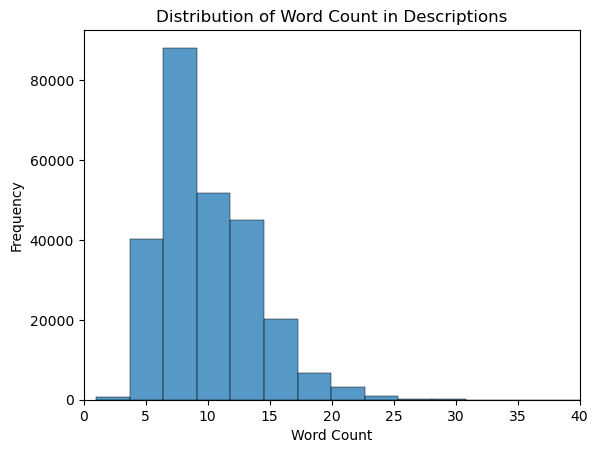

In [5]:
# Obtain the length of each Description, counting words by splitting on spaces
description_word_count = df['Description'].apply(lambda x: len(x.split()))

# Create the histogram
sns.histplot(description_word_count, bins=100)
plt.title('Distribution of Word Count in Descriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

min_length = 0
max_length = 40
plt.xlim(min_length, max_length) 

plt.show()


In [6]:
outside_range_count = 0
for count in description_word_count:
    if count < min_length or count > max_length:
        outside_range_count += 1
        
print(f"There are {outside_range_count} desctiptions that are less than {min_length} and more than {max_length} words")

There are 3 desctiptions that are less than 0 and more than 40 words


It can be seen that most of the questions are relatively short and have a length that is under 40 words with most lying between 0 and 20 words. Having a lot of short descriptions is helpful since it will easy the amount of computation and make it easier to match the user queries against the descriptions to obtain the closest match.

#### Distribution of Patient Question length

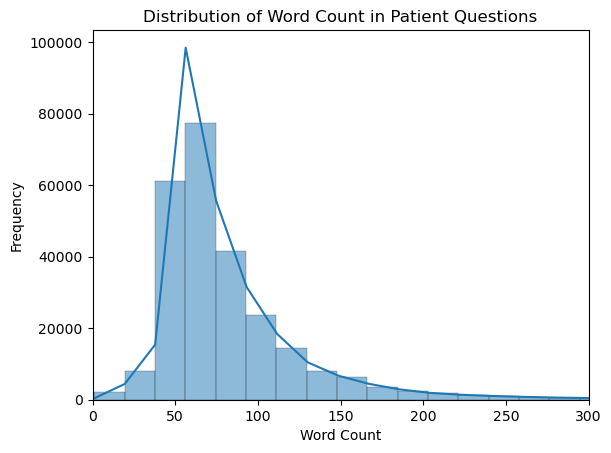

In [7]:
# Obtain the length of each Patient Question, counting words by splitting on spaces
patient_word_count = df['Patient'].apply(lambda x: len(x.split()))

# Create the histogram
sns.histplot(patient_word_count, bins=200, kde=True)
plt.title('Distribution of Word Count in Patient Questions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

min_length = 0
max_length = 300
plt.xlim(min_length, max_length) 

plt.show()

In [8]:
outside_range_count = 0
for count in patient_word_count:
    if count < min_length or count > max_length:
        outside_range_count += 1
        
print(f"There are {outside_range_count} patient questions that are less than {min_length} and more than {max_length} words")

There are 2451 patient questions that are less than 0 and more than 300 words


The patient questions are much longer than their descriptions. It can be seen that most of the questions asked by the patients tend to lie between 50 and 100 words

#### Distribution of Doctor Answer

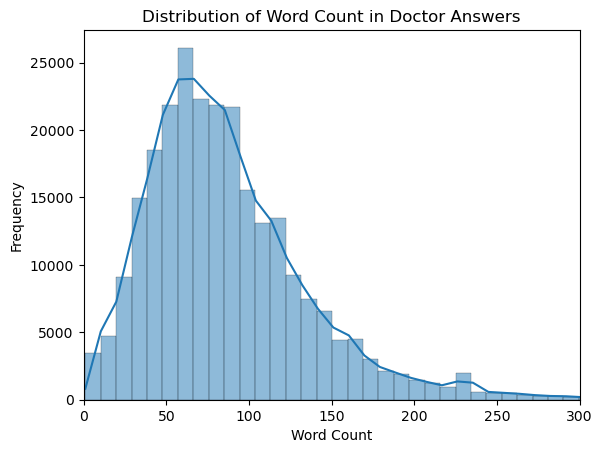

In [9]:
# Obtain the length of each Patient Question, counting words by splitting on spaces
doctor_word_count = df['Doctor'].apply(lambda x: len(x.split()))

# Create the histogram
sns.histplot(doctor_word_count, bins=200, kde=True)
plt.title('Distribution of Word Count in Doctor Answers')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

min_length = 0
max_length = 300
plt.xlim(min_length, max_length) 

plt.show()

In [10]:
outside_range_count = 0
for count in doctor_word_count:
    if count < min_length or count > max_length:
        outside_range_count += 1
        
print(f"There are {outside_range_count} patient questions that are less than {min_length} and more than {max_length} words")

There are 2524 patient questions that are less than 0 and more than 300 words


The doctor's answers to the patient's queries are understandably longer. The above disctibution seems close to being normally distributed. Most responses seem to lie in the range of 50-150 words. A peak in response length can be seen around 60 words. This will help our AI chatbot produce detailed answers.